## **Plataforma para descobrir Fluxos de Diálogo através de Técnicas de Aprendizagem Computacional**

### Funcionalidades da Plataforma desenvolvida: 


*   *Clustering*
*   Descobrir Fluxos



####**Por Funcionar:**


*   K-Means Feature Importance
*   Remove Topic Features (funciona, mas não automatizada)
*   Definir se problema é multi ou single label conforme os ficheiros corpora...




In [2]:
# ! git clone https://github.com/YousefGh/kmeans-feature-importance.git
# from kmeans_interp.kmeans_feature_imp import KMeansInterp #não está em funcionamento





# if csvFileInput == "/content/drive/MyDrive/ColabNotebooks/datasets/multiwoz_v31.csv" :
#   problem = "multi" #define if is "multi" or "single" labelled
# else:
#   problem = "single"



# PROBLEMAS POR RESOLVER

problem = "teste" #enquanto não se resolve o problema de multi ou single
#só caso exista labels 
#if 'trueLabel' in normalizedDF.columns:
  #nDAsInt = normalizedDF['trueLabel'].nunique() #nº de Dialog Acts / Intents reais -> usado para o t-SNE e PCA
  #setOfLabels = setLabels(normalizedDF, problem) #return of the labels
#DBSCAN
#y_predicted = ClusteringDBSCAN(vectors, eps=0.7, minsamples = 5)
#nClusters = np.unique(y_predicted).size # update nCluster according produced by DBSCAN (ONLY FOR DBSCAN)
#Evaluation(y_predicted, csvFileInput, setOfLabels, nClusters)

#K-Means
#if 'trueLabel' in normalizedDF.columns:  #supervised way, if there the column with labels
  #nClusters = chooseNumberCluster("equal", normalizedDF) #equal | total # nCluster = nDA / Int | total / max
#else:
  #nClusters = silhouetteMethod(vectors, 2, 35, 4) #unsupervised way (vectors, minK, maxK, increment) sequence of numbers from minK to maxK, but increment
#print('O número de Clusters a usar será ' + str(nClusters) + '!!')


# Visualization Data -> t-SNE & PCA
# Use perplexity for t-sne effectively, like here: https://distill.pub/2016/misread-tsne/

#createTSNE(y_predicted, normalizedDF, vectors, nDAsInt, Perplexity=1)
#createPCA(y_predicted, normalizedDF, vectors, nDAsInt)



# #System
# if user == "SYSTEM"or user == "system":
#   #System+SentenceTransformer
#   if embedding == "sentenceTransformer":
#     vectors_system = useSentenceTransformer(df_system, model)
#     labels_system, centers_system = ClusteringKMeans(vectors_system, nClusters, nomeFichPickle)
#     df_system = df_system.assign(cluster = labels_system)

#     df_final = df_system
#     df_final.sort_values(by=['sequence'], inplace=True) 
    
#     externalEvaluationMultiLabel(df_final) #doesn't work

#   #System+word2vec
#   if embedding == "word2vec":
#     vectors_system = word2vec(df_system) 
    

#   #System+TF-IDF
#   if embedding == "tfidf":
#     if useTopicFeature == "true":  
#       TopicFeatures = TopicFeaturesToRemove(normalizedDF, numberFeatures, TopicFeature=True) #topic features
#     elif useTopicFeature == "false":  
#       TopicFeatures = TopicFeaturesToRemove(normalizedDF, numberFeatures, TopicFeature=False) #topic features
#     vectors_system = PreProcessingTFIDF(normalizedDF, TopicFeatures, maxdf, mindf)
#     labels_system, centers_system = ClusteringKMeans(vectors_system, nClusters, nomeFichPickle)


# if user == "USER"or user == "user":
#   if embedding == "sentenceTransformer":
#     vectors_user = useSentenceTransformer(df_user, model)
#   if embedding == "word2vec":
#     vectors_user = word2vec(df_user) 
#   if embedding == "tfidf":
#     print("tf-idf")

#### Setup:
*   Montar a plataforma em 'path_to_module';
*   Instalação de repositórios e módulos; 
*   Importar bibliotecas e módulos necessários ao funcionamento;
*   Declarar variáveis globais.




In [3]:
from google.colab import drive
import sys  
drive.mount("/content/drive", force_remount=True)
path_to_module = '/content/drive/MyDrive/ColabNotebooks'
sys.path.append(path_to_module)

Mounted at /content/drive


In [4]:
!pip install --upgrade kneed
!pip install -qU transformers sentence-transformers
!pip install clean-text
!pip install -U seaborn
!pip install Unidecode
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install git+https://github.com/mmxgn/spacy-clausie.git
!python -m spacy download en_core_web_md 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d733ffdb1ec6d132719beb5562fa559f1218f3febeb37f8f27985f00a597f4a6
  Stored in 

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
import gensim.corpora as corpora
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
import nltk
import spacy
import string
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import ParameterGrid
from nltk import bigrams, trigrams
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from nltk.stem import WordNetLemmatizer
from transformers import AutoTokenizer, AutoModel
import torch
import sys
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
import networkx as nx
from pprint import pprint 
from graphviz import Source
from networkx.readwrite import text
from io import StringIO
from kneed import KneeLocator
import cleantext
import re
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
import claucy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load("en_core_web_md") 
stopwordseng = nltk.corpus.stopwords.words('english')

# Models of SentenceTransformer choosed by results here: 'https://www.sbert.net/docs/pretrained_models.html'
miniLM6 = SentenceTransformer('all-MiniLM-L6-v2')
#mpnetBase = SentenceTransformer('all-mpnet-base-v2')
#distilroberta = SentenceTransformer('all-distilroberta-v1')
#miniLM12 = SentenceTransformer('all-MiniLM-L12-v2')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### Outras:
*   xxx
*   xxx
*   XXX

In [7]:
def chooseNumberCluster(opt, normalizedDF):
  column = normalizedDF['trueLabel'].value_counts()

  total = column.sum()
  max_value = column.max()
  min_value = column.min()

  numberExact = normalizedDF.trueLabel.nunique()
  total = total/max_value
  total = round(total, 0)
  total = int(total)

  if opt=="equal":
    nClusters = numberExact
  if opt=="total":
    nClusters = total
  
  #print('O número de Clusters a usar será ' + str(nClusters) + '!!')


  return nClusters

In [94]:
# Normalize turn_id by (all turn_id's/max turn_id) and some column names
def normalizeDataset(csvFileInput, regex=None, removeGreetings=None, speaker=None):
  df_initial = pd.read_csv(csvFileInput, on_bad_lines='skip', sep=";")

  url_pattern = r'https?://\S+'
  url_placeholder = 'xURLx'
  user_tags_pattern = '^@\S+'
  user_tags_placeholder = 'xUSERNAMEx'

  # Normalize names to utterance and trueLabel
  if 'text' in df_initial.columns: 
    df_initial.rename(columns = {'text':'utterance'}, inplace = True)
  
  if 'Utterance' in df_initial.columns: 
    print(df_initial.columns)
    df_initial.rename(columns = {'Utterance':'utterance'}, inplace = True)
  
  if 'transcript' in df_initial.columns: 
    df_initial.rename(columns = {'transcript':'utterance'}, inplace = True)

  if 'intent_title' in df_initial.columns: 
    df_initial.rename(columns = {'intent_title':'trueLabel'}, inplace = True)

  if 'intents' in df_initial.columns: 
    df_initial.rename(columns = {'intents':'trueLabel'}, inplace = True)

  if 'active_intent' in df_initial.columns: 
    df_initial.rename(columns = {'active_intent':'trueLabel'}, inplace = True)

  if 'intent' in df_initial.columns: 
    df_initial.rename(columns = {'intent':'trueLabel'}, inplace = True)

  if 'dialog_act' in df_initial.columns: 
    df_initial.rename(columns = {'dialog_act':'trueLabel'}, inplace = True)

  if 'dialogue_act' in df_initial.columns: 
    df_initial.rename(columns = {'dialogue_act':'trueLabel'}, inplace = True)

  if 'utterance' in df_initial.columns: 
    df_initial['utterance'] = df_initial['utterance'].astype(str)

  # ver o que fazer
  if 'turn_id' in df_initial.columns: 
    max_value = np.max(df_initial['turn_id'])
    df_initial['turn_idNormalized'] = df_initial['turn_id'] / max_value
    df_initial['turn_idNormalized'] = df_initial['turn_idNormalized'].round(decimals = 3)

  if 'trueLabel' in df_initial.columns:
    df_initial['trueLabel'] = df_initial['trueLabel'].replace(' ', '_', regex=True)

  if 'trueLabel' in df_initial.columns:
    df_initial['utterance']= df_initial['utterance'].apply(lambda x: x.lower())
  
  #preencher labels vazias com o 'none' check
  if 'trueLabel' in df_initial.columns:
    df_initial.trueLabel = df_initial.trueLabel.fillna('none')

  if regex is True:
    df_initial['utterance'] = df_initial['utterance'].replace(to_replace = url_pattern, value = url_placeholder, regex = True)
    df_initial['utterance'] = df_initial['utterance'].replace(to_replace = user_tags_pattern, value = user_tags_placeholder, regex = True)

  greetings_stopwords = ["hello", "hi", "bye", "goodbye", "hey"]
  #if removeGreetings is True:
    #for i in greetings_stopwords: 
      #df_initial['utterance'] = df_initial['utterance'].str.replace(i, '', regex=False)
  #if 'speaker' in df_initial.columns:
    #if speaker == "both":
      #df_initial = df_initial
    
    #if speaker == "USER":
      #df_initial = df_initial[df_initial['who'].values == 'USR']
      #df_initial = df_initial[df_initial['speaker'].values == 'USER'] #multiwoz
      #df_initial = df_initial.reset_index(drop=True)

  #if speaker == "SYSTEM":
    #df_initial = df_initial[df_initial['who'].values == 'SYS'] 
    #df_initial = df_initial[df_initial['speaker'].values == 'SYSTEM'] #multiwoz
    #df_initial = df_initial.reset_index(drop=True)

  #df_initial['speaker'] = df_initial['speaker'].str.strip()

  #create dialogue_id based on turn_id
  if 'dialogue_id' not in df_initial.columns and 'turn_id' in df_initial.columns: 
    dialog = 0
    result = []
    i_anterior = -1
    for i in df_initial['turn_id']:
      if i_anterior == -1 or i > i_anterior:
        i_anterior = i
      else:
        dialog = dialog + 1
        i_anterior = -1
      result.append(dialog)
    df_initial['dialogue_id'] = result

  if 'turn_id' not in df_initial.columns and 'dialogue_id' in df_initial.columns:
    df_initial['turn_id'] = df_initial.groupby('dialogue_id').cumcount()

  #create variable which is a incremental sequence by number of utterances
  df_initial['sequence'] = [i for i in range(len(df_initial))]

  return df_initial

In [9]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def preProcessingText(normalizedDF):
  dataframe = normalizedDF
  #dataframe['utterance']= dataframe['utterance'].apply(lambda x:remove_punctuation(x))
  dataframe['utterance']= dataframe['utterance'].apply(lambda x: x.lower())
  re.sub(r'https?://[\n\S]+\b', '<URL>', dataframe['utterance'])
  #dataframe['utterance']= dataframe['utterance'].replace(to_replace = r\"\\d+ \\d+|012\\d{8}|017\\d{8}|017-\\d{3}-\\d{3}\", value = '#PhoneNumber', regex = True")
  #dataframe['utterance']= dataframe['utterance'].replace(to_replace = r\"C.B \\d+, \\d+ [A-Za-z].[A-Za-z]\", value = 'postalcode', regex = True")

  print(dataframe)
  return dataframe

In [10]:
# Functions needed to use the function to remove Topic Features (Topic Modeling) 
# function to convert sentences to words
def sentencesToWords(sentences): 
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True -> meaning removes punctuations

# make bigrams
def make_bigrams(texts, dataInput):  
    data = dataInput
    data_words = list(sentencesToWords(data))
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

# lemmatization, converting a word to its root word. ‘walking’ –> ‘walk’
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(
            [token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [11]:
# words that represent a topic, can choose in PreProcessing if that words will be ignored
def TopicFeaturesToRemove(normalizedDF, numberFeatures, useTopicFeature):
  if useTopicFeature == "True":  # if it's true ...
        df_initial = normalizedDF
        data = df_initial['utterance'].values.tolist()
        
        # convert sentences to words
        data_words = list(sentencesToWords(data))

        # form bigrams
        data_words_bigrams = make_bigrams(data_words, data)

        # do lemmatization keeping only noun, adj, vb, adv
        data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=[
            'NOUN', 'ADJ', 'VERB', 'ADV'])

        # Create Dictionary
        id2word = corpora.Dictionary(data_lemmatized)

        # Create Corpus
        texts = data_lemmatized

        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in texts]

        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=20,
                                                    random_state=100,
                                                    update_every=1,
                                                    chunksize=100,
                                                    passes=10,
                                                    alpha='auto',
                                                    per_word_topics=True)

        lda_topics = lda_model.show_topics(num_words=numberFeatures)
        
        topics = []
        filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
        for topic in lda_topics:
            #print(topic)
            topics.append(preprocess_string(topic[1], filters))
            flat_list = [item for sublist in topics for item in sublist]
            #print(flat_list)
            return flat_list
  else:
        flat_list = []
        #print(flat_list)
        return flat_list

In [12]:
def silhouetteMethod(vectors, minK, maxK, incr):
  data = vectors
  numberClusters = 0
  atual_silhouette = 0.000
  #Prepare the scaler
  scale = StandardScaler().fit(data)

  #Fit the scaler
  scaled_data = pd.DataFrame(scale.fit_transform(data))
  #scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
  X = scaled_data

  #For the silhouette method k needs to start from 2
  K = range(minK, maxK, incr)
  silhouettes = []
  
  #Fit the method
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
    score = silhouette_score(X, kmeans.labels_)
    print(score)
    if score > atual_silhouette:
      numberClusters = k
      atual_silhouette = score
  #Plot the results
  fig = plt.figure(figsize= (15,5))
  plt.plot(K, silhouettes, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette score')
  plt.title('Silhouette Method')
  plt.grid(True)
  plt.show()

  #kl = KneeLocator(K, silhouettes, curve="concave", direction="increasing")
  #print('Suggested number of clusters: ', kl.elbow)

  #return kl.elbow
  return numberClusters

#### Funções para Word Embedding:
*   Sentence Transformer
*   XXX
*   XXX

In [13]:
# function to use the models of sentenceTransformer
def useSentenceTransformer(normalizedDF, model):
    df_initial = normalizedDF
    docs = df_initial['utterance']

    # transform Series into list
    sentences = df_initial['utterance'].tolist()

    # sentences are encoded by calling model.encode()
    embeddings = model.encode(sentences)
    #print(embeddings)

    vectors = np.array(embeddings)
    print(vectors.shape)
    #vectors = np.append(vectors, df_initial['turn_id'], axis=2)
    #final_vectors = np.column_stack((vectors,df_initial['turn_id'], df_initial['interlocutor']))
    #final_vectors = np.column_stack(vectors)

    #df_final = pd.DataFrame(final_vectors) #doubt if the return is final_vectors or df_final
    #print(final_vectors)
    print("--> sentence-transformers used with success!")
    #pd.DataFrame(final_vectors).to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/DFProcessed.csv', index=False)
    #final_vectors = pd.concat((vectors, df_initial['turn_id'], df_initial['interlocutor']), axis = 1).values #axis 1 meaning concatenates in column wise

    return vectors

In [14]:
# function to convert word to vectors
def word2vec(normalizedDF):
  df_initial = normalizedDF

  sentences = df_initial['utterance'].tolist()
  vectors = []
  for utterance in sentences:
        doc = nlp(utterance)
        vector = doc.vector
        vectors.append(vector)
  vectors = pd.DataFrame(vectors)
  print(vectors.shape)
  print("--> word2vec used with success!")

  #final_vectors = np.append(vectors, df_initial['turn_id'], axis=2)
  #final_vectors = np.column_stack((vectors,df_initial['turn_id'], df_initial['interlocutor']))
  #pd.DataFrame(final_vectors).to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/DFProcessed1.csv', index=False)

  return pd.DataFrame(vectors)

In [15]:
# function to use TD-IDF 
def PreProcessingTFIDF(normalizedDF, topicFeatures, maxDF, minDF):
    df_initial = normalizedDF
    
    # transformar coluna 'utterance' em lista e tudo minusculo
    df_initial['utterance'].tolist()
    df_initial['utterance'] = [
        x for x in df_initial['utterance'].map(lambda x: str(x).lower())]

    stopwordsAndTopic = stopwordseng
    stopwordsAndTopic.extend(topicFeatures)  # Stopwords + Topic Features
    
    
    # TfidfVectorizer
    count_vectTFIDF = TfidfVectorizer(
        stop_words=stopwordsAndTopic, max_df=maxDF, min_df=minDF, ngram_range=(1, 1))
    count_matrix = count_vectTFIDF.fit_transform(
        df_initial['utterance'].tolist())
    count_array = count_matrix.toarray()
    df_TFIDF = pd.DataFrame(
        data=count_array, columns=count_vectTFIDF.get_feature_names_out())
    
    # guardar dataframes num csv
    #final_vectors = pd.concat((df_TFIDF, df_initial['turn_id'], df_initial['interlocutor']), axis = 1) #axis 1 meaning concatenates in column wise
    final_vectors = df_TFIDF #axis 1 meaning concatenates in column wise
    #pd.DataFrame(list(final_vectors)).to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/DFProcessed2.csv', index=False)
    #pd.DataFrame(final_vectors).to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/DFProcessed2.csv', index=False)
    print(final_vectors.shape)
    print("--> tf-idf used with success!")

    return final_vectors

#### Funções para clustering:
*   K-Menas
*   XXX



In [16]:
# function that receive vectors and do the clustering in KMeans
def ClusteringKMeans(vectors, nClusters, nomeFichPickle):
    

    kmeans = KMeans(n_clusters=nClusters, init='k-means++', max_iter=500)
    kmeans.fit(vectors)

    labelsKMeans = kmeans.labels_
    centersKMeans = kmeans.cluster_centers_
    #print(labelsKMeans)
    print("\nInternal Evaluation:\nSilhouette Score: ", metrics.silhouette_score(vectors, labelsKMeans))
    print("Davies–Bouldin Index (DBI): ", davies_bouldin_score(vectors, labelsKMeans))
    
    # Save the model to a file
    with open(nomeFichPickle, 'wb') as f:
      pickle.dump(kmeans, f)

    return labelsKMeans, centersKMeans

In [17]:
# function that receive vectors and do the clustering in DBSCAN (-1 cluster represents outliers)
def ClusteringDBSCAN(vectors, eps, minsamples):

    dbscan = DBSCAN(eps = eps, min_samples = minsamples).fit(vectors) # fitting the model
    labelsDBSCAN = dbscan.labels_ # getting the labels
    #dbscan = DBSCAN(eps=3, min_samples=20)
    #stsclr = StandardScaler().fit(vectors)  # standardizar as features
    #norm_data = stsclr.transform(vectors)
    #dbscan.fit(norm_data)
    #labelsDBSCAN = dbscan.labels_
    print(labelsDBSCAN)
    
    nClusters = np.unique(dbscan.labels_).size
    print("\nInternal Evaluation:\nSilhouette Score: ", metrics.silhouette_score(vectors, labelsDBSCAN))
    print("Davies–Bouldin Index (DBI): ", davies_bouldin_score(vectors, labelsDBSCAN))

    return labelsDBSCAN

In [18]:
def setLabels(normalizedDF, problem):  # change de setLabels() according to the problem to be treated

    normalizedDF['trueLabel'] = normalizedDF['trueLabel'].fillna("none")
    normalizedDF['trueLabel'] = normalizedDF['trueLabel'].astype(str)
    total = normalizedDF['trueLabel'].value_counts().sum()
    #print(normalizedDF['trueLabel'].value_counts())
    setOfLabels = set()

    if problem == "multi":
      #print("Multi-Label Problem")
      for i in range(len(normalizedDF['trueLabel'])):
          for j in normalizedDF['trueLabel'][i].split(','):
            setOfLabels.add(j.split(" ")[0])
            for j in normalizedDF['trueLabel'][i].split('\n'):
              setOfLabels.add(j.split(",")[0])
      setOfLabels.remove("")

    if problem == "single":
      #print("Single-Label Problem")
      for i in range(len(normalizedDF['trueLabel'])):
        for j in normalizedDF['trueLabel'][i].split('\n'):
          setOfLabels.add(j.split(" ")[0])
    numberLabels = len(setOfLabels)

    return setOfLabels, numberLabels

#### Funções para fazer avaliação e validação:
*   XXX
*   XXX

In [19]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    #print(contingency_matrix)
    # return purity
    #print(np.sum(np.amax(contingency_matrix, axis=1)))
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
    #  Inverse Purity, all you need to do is replace "axis=0" by "axis=1".

In [20]:
def inversepurity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    #print(contingency_matrix)
    # return purity
    #print(np.sum(np.amax(contingency_matrix, axis=1)))
    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix) 
    #  Inverse Purity, all you need to do is replace "axis=0" by "axis=1".

In [21]:
def Evaluation(y_predicted, normalizedDF, setOfLabels, nClusters):

    #df_initial = pd.read_csv(csvFileInput, on_bad_lines='skip', sep=';')
    evaluationDF = pd.DataFrame() 

    evaluationDF['trueLabel'] = normalizedDF['trueLabel'].fillna("none")

    labels_pred = np.array(y_predicted)
    
    ground_truth = pd.DataFrame(evaluationDF, columns=['trueLabel'])

    mapOfLabels = dict(zip(setOfLabels, np.arange(nClusters)))

    labels_true = evaluationDF['trueLabel'].map(mapOfLabels)

    #df_labels.to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/DFProcessed33.csv', index=False)
    counts = np.linspace(0, 0, num=nClusters*nClusters).reshape(
        (nClusters, nClusters))  # columns clusters, lines labels
    
    for i in range(len(labels_pred)):
        # for j in ground_truth['dialog_act'][i].replace("\'", "").replace("}", "").replace("{", "").replace("", "")
        # .replace(";", " ").split(','):
        for j in ground_truth['trueLabel'][i].split(';'):
            # para cada label desta frase, vai contar mais um no array para ver quem ganha
            # print(mapOfLabels[j])
            # print(int(labels[i]))
            # if j.split("_")[0] != 'none' and j.split("_")[0] != 'nooffer':
            # if j.split(" ")[0] != 'none' and j.split(";")[0] != 'nooffer':
            if j.split(" ")[0] != 'noofferr':
                counts[mapOfLabels[j.split(",")[0]]][int(
                    labels_pred[i])] = counts[mapOfLabels[j.split(",")[0]]][int(labels_pred[i])] + 1
    print("\n")
    print(counts)
    for i in range(nClusters):  # cluster i
        maior = 0
        indice = -1
        for j in range(nClusters):  # label j
            if counts[j][i] >= maior:
                maior = counts[j][i]
                indice = j
        if indice != -1:
            print('cluster:', i, 'label:', list(
                setOfLabels)[indice])
            evaluationDF['trueLabel'] = evaluationDF['trueLabel'].replace([list(
                setOfLabels)[indice]], [i])
        else:
            print('cluster:', i, 'label:not defined')

    #print(labels_pred)
    print("\nExternal Evaluation:\nAccuracy: ", accuracy_score(labels_true, labels_pred))
    # print('AMI: ', metrics.adjusted_mutual_info_score(
    # labels_true, labels_pred))
    # print('NMI: ', metrics.normalized_mutual_info_score(
    # labels_true, labels_pred))
    # print('Homogeneity: ', metrics.homogeneity_score(labels_true, labels_pred))
    # print('Completeness: ', metrics.completeness_score(labels_true, labels_pred))
    print('V-Measure: ', metrics.v_measure_score(labels_true, labels_pred))
    print('Purity: ', purity_score(labels_true, labels_pred))
    print('Inverse Purity: ', inversepurity_score(labels_true, labels_pred))
    purityf1 = (purity_score(labels_true, labels_pred)+inversepurity_score(labels_true, labels_pred))/2
    print('Purity F1: ', purityf1)

In [22]:
def externalEvaluationMultiLabel(normalizedDF, number_clusters):

  # define all labels in a single list to get all classes names, if it's multilabel or single label
  setOfLabels = set()
  if problem == "multi":
      #print("Multi-Label Problem")
      for i in range(len(normalizedDF['trueLabel'])):
          for j in normalizedDF['trueLabel'][i].split(','):
            setOfLabels.add(j.split(" ")[0])
            for j in normalizedDF['trueLabel'][i].split('\n'):
              setOfLabels.add(j.split(",")[0])
      setOfLabels.remove("")
  if problem == "single":
    #print("Single-Label Problem")
    for i in range(len(normalizedDF['trueLabel'])):
      for j in normalizedDF['trueLabel'][i].split('\n'):
        setOfLabels.add(j.split(" ")[0])
  classes = list(setOfLabels)
  
  # define the true Label in a list
  y_expected = []
  for i in range(len(normalizedDF['trueLabel'])):
    sublist = []
    for j in normalizedDF['trueLabel'][i].split(','):
      if(len(j)>0):
        sublist.append(j)
    y_expected.append(sublist)
  
  # multilabel Binarizer
  multilabel_binarizer = MultiLabelBinarizer(classes=classes)
  multilabel_binarizer.fit([[classes]])
  y_expected_binarizer = multilabel_binarizer.transform(y_expected)

  # create dataframe with all labels binarized
  df_labels_binarizer = pd.DataFrame(y_expected_binarizer, columns = [classes])

  # create matrix of occurrencies lines -> clusters; rows -> labels
  matriz_contagens = np.zeros((number_clusters, number_clusters)) 
  for index, row in df_labels_binarizer.iterrows():
    for i in range(len(row.values)):
      if row.values[i] == 1:
        #array_contagens.append('{:2d}'.format(df_final['cluster'][index])+" ")
        #print('{:2d}'.format(df_final['cluster'][index]), end=" ")
        #row.values[i] = df_final['cluster'][index]
        matriz_contagens[df_final['cluster'][index], i] += 1
      #else:
        #array_contagens.append('-1'+ " ")
        #print('-1', end=" ")
    #array_contagens.append('')
    #print('')
  
  
  #create dataframe with counts (clusters, labels)
  df_countLabels = pd.DataFrame(matriz_contagens, columns = [classes])

  df_countLabels = df_countLabels.reset_index(drop=True)
  df_countLabels = pd.DataFrame(df_countLabels.to_records())
  df_countLabels = df_countLabels.drop(columns=["index"])
  df_countLabels.columns = df_countLabels.columns.str.replace("[('')]", "", regex=True)

  # look for the max values in each row
  mxs = df_countLabels.eq(df_countLabels.max(axis=1), axis=0)
  # join the column names of the max values of each row into a single string
  df_countLabels['MaxLabel'] = mxs.dot(mxs.columns + '').str.rstrip('')


  def match(row):
    pred_labels = row['predictedLabel'].rstrip(',').split(',')
    true_labels = row['trueLabel'].rstrip(',').split(',')
    for label in pred_labels:
        if label in true_labels:
            return True
    return False

  def copy_value_or_null(row):
    if row['PartialMatch']:
        return row['predictedLabel']
    else:
        return 'null'


  if problem == "single":
    df_final['predictedLabel'] = df_final['cluster'].map(df_countLabels['MaxLabel'])
    df_final['predictedLabel'] = df_final['predictedLabel'] .replace(',','', regex=True)
    df_final['ExactlyMatch'] = df_final.predictedLabel.eq(df_final.trueLabel)
    true_count = (df_final['ExactlyMatch']).value_counts()[True]
    false_count = (df_final['ExactlyMatch']).value_counts()[False]
    total_count = true_count + false_count
    accuracy_score = true_count/total_count
    print("External Evaluation:\nExact Accuracy: ", accuracy_score)
    #print(df_final['trueLabel'])
    #print(df_final['predictedLabel'])
    print('Exact V-Measure: ', metrics.v_measure_score(df_final['trueLabel'], df_final['predictedLabel']))

  if problem == "multi":
    df_final['predictedLabel'] = df_final['cluster'].map(df_countLabels['MaxLabel'])
    df_final['ExactMatch'] = df_final.predictedLabel.eq(df_final.trueLabel)
    true_count = (df_final['ExactMatch']).value_counts()[True]
    false_count = (df_final['ExactMatch']).value_counts()[False]
    total_count = true_count + false_count
    accuracy_score = true_count/total_count
    print("External Evaluation:\nExact Accuracy: ", accuracy_score)

    print('Exact V-Measure: ', metrics.v_measure_score(df_final['trueLabel'], df_final['predictedLabel']))

    df_final['PartialMatch'] = df_final.apply(match, axis=1)
    true_count_partial = (df_final['PartialMatch']).value_counts()[True]
    false_count_partial = (df_final['PartialMatch']).value_counts()[False]
    total_count_partial = true_count_partial + false_count_partial
    accuracy_score_partial = true_count_partial/total_count_partial
    print("Partial Accuracy: ", accuracy_score_partial)
    #df_final['PartialLabel'] = df_final['PartialMatch'].values
    df_final['PartialLabel'] = df_final.apply(copy_value_or_null, axis=1)
    print('Partial V-Measure: ', metrics.v_measure_score(df_final['trueLabel'], df_final['PartialLabel']))

    #print(df_final['Match111'])
    #df_final['intersection'] = df_final[df_final['trueLabel'].str.contains(df_final['predictedLabel']) & df_final['predictedLabel'].str.contains(df_final['trueLabel'])]['predictedLabel']
    #df_final['intersection'] =  df_final['intersection'].apply(lambda x: np.intersect1d(df_final['predictedLabel'],df_final['trueLabel']), axis = 1)
    #print(df_final)
    #df_final.to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/DFProcessed33.csv', index=False)


  # # mapping values
  # df_final['predictedLabel'] = df_final['cluster'].map(df_countLabels['MaxLabel'])
  # # determine where Predicted equals Actual
  # df_final['ExactlyMatch'] = df_final.predictedLabel.eq(df_final.trueLabel)

  # #df_final['trueLabel'] = df_final['trueLabel'].astype(str)
  # #df_final['predictedLabel'] = df_final['predictedLabel'].astype(str)
  # #df_final['PerfectMatch'] = df_final['trueLabel'].split(', ').apply(lambda x: any(y in x for y in df_final['predictedLabel'].split(', ')))


  # #df_final['PerfectMatch'] = [len(set(a).intersection(b)) for a, b in zip(df_final.predictedLabel, df_final.trueLabel)]
  # #print(df_final)

  # # calculate accuracy, but only if multi label matches 
  # true_count = (df_final['ExactlyMatch']).value_counts()[True]
  # false_count = (df_final['ExactlyMatch']).value_counts()[False]
  # total_count = true_count + false_count
  # accuracy_score = true_count/total_count

  # # calculate accuracy, but only if any match happens
  # #true_count_less_penalizing = (df_final['PerfectMatch']).value_counts()[True]
  # #false_count_less_penalizing = (df_final['PerfectMatch']).value_counts()[False]
  # #total_count_less_penalizing = true_count_less_penalizing + false_count_less_penalizing
  # #accuracy_less_penalizing = true_count_less_penalizing/total_count_less_penalizing

  # print("\nExternal Evaluation:\nExactly Accuracy: ", accuracy_score)
  # #print("Accuracy Less Penalizing: ", accuracy_less_penalizing)
  # #print('Accuracy: ', metrics.accuracy_score(df_final['trueLabel'], df_final['predictedLabel']))
  # print('V-Measure: ', metrics.v_measure_score(df_final['trueLabel'], df_final['predictedLabel']))


#### Funções para visualização dos dados:
*   XXX
*   XXX

In [143]:
def createPCA(y_predicted, normalizedDF, vectors, nClusters):
  
  df_initial = normalizedDF
  y_true = df_initial['trueLabel']

  Sc = StandardScaler()
  X = Sc.fit_transform(vectors)

  pca = PCA(n_components=3)
  pca_result = pca.fit_transform(X)

  # sns settings
  sns.set(rc={'figure.figsize':(13,9)})
  
  # colors
  palette = sns.hls_palette(nClusters, l=.4, s=.9)

  # plot
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y_true, legend='full')
  plt.title('PCA with Kmeans Labels')
  #plt.savefig("improved_cluster_tsne.png")
  plt.show()

In [161]:
def createTSNE(y_predicted, normalizedDF, vectors, nClusters, Perplexity):
  
  df_initial = normalizedDF
  df_initial = df_initial.rename(columns={'trueLabel': 'Intents'}) # Or Dialog Acts
  y_true = df_initial['Intents'] # Or Dialog Acts

  Sc = StandardScaler()
  X = Sc.fit_transform(vectors)


  tsne = TSNE(perplexity=Perplexity, learning_rate=10, n_iter = 250)  # Changed perplexity from 100 to 50 per FAQ
  X_embedded = tsne.fit_transform(X)

  # sns settings
  sns.set(rc={'figure.figsize':(13,9)})

  # colors
  palette = sns.color_palette(n_colors = nClusters)

  # plot
  g = sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_true, legend=False, palette=palette) #legend='full'
  plt.title('t-SNE with Kmeans Labels')
  #plt.savefig("improved_cluster_tsne.png")
  plt.show()

#### Funções para produzir o fluxo:
*   XXX
*   XXX

In [25]:
def transition_matrix(n, transitions): #transitions is for y_predicted
    #n = nClusters #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [26]:
# https://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017
def createMatrix(clusLabelled, normalizedDF, y_predicted): #return of matrix
  df_initial = normalizedDF
  df_probs = pd.DataFrame() 
  df_probs['predicted'] = y_predicted

  matriz = np.zeros(shape=(nClusters, nClusters))

  #DAR A VOLTA AO TURN_ID PARA AS MATRIZES
  #if 'turn_id' in df_initial.columns: 
    #df_probs['turn_id'] = df_initial['turn_id']

  t = df_probs['predicted']

  m = transition_matrix(t)
  names = [_ for _ in clusLabelled['labels']]

  df_matrix = pd.DataFrame(m, index=names, columns=names)
  df_matrix = df_matrix.round(decimals = 2)
  print(df_matrix)
  return df_matrix

In [27]:
#INITIALLY
def generateMarkovChain(matrix, nclusters):
  states = list(matrix.columns.values)
  # equals transition probability matrix of changing states given a state
  q_df = pd.DataFrame(columns=states, index=states)
  q_df = matrix
  for p in range(nclusters):
    q_df.loc[states[p]].reset_index = matrix.iloc[p]
  #q = q_df.values
  def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges
  edges_wts = _get_markov_edges(q_df)
  #pprint(edges_wts)
  # create graph object
  G = nx.MultiDiGraph()
  # nodes correspond to states
  G.add_nodes_from(states)
  # edges represent transition probabilities
  for k, v in edges_wts.items():
      tmp_origin, tmp_destination = k[0], k[1]
      G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
  #remove edges below threshold
  threshold = 0.2
  G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
  nx.draw_networkx(G, pos)
  # create edge labels for jupyter plot but is not necessary
  edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
  nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
  nx.drawing.nx_pydot.write_dot(G, '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot')
  # generate pdf with markov chain
  path = '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot'
  s = Source.from_file(path)
  s.view()

#### Funções para atribuir labels aos clusters:
*   Bigrama mais representado em cada cluster;
*   Verbo e Sintagma mais representado em cada cluster;
*   XXX

In [28]:
def describeClustersBigrams(normalizedDF, y_predicted, numberClusters):
  df_initial = normalizedDF

  df_teste = pd.DataFrame() # utterance and y_predicted
  df_teste['predicted'] = df_initial['cluster']
  df_teste['corpus'] = normalizedDF['utterance']

  LC=[] #clusters
  LBG=[] #bigrams


  for p in range(numberClusters):

    predictedDF = df_teste[df_teste['predicted'] == p]  #mudar numeros
    #print(predictedDF['corpus'])
 
    corpus = predictedDF['corpus']

    df_corpus = pd.DataFrame(corpus)
    df_corpus.columns = ['docs_in_cluster']
    #print(df_corpus)

    c_vec = CountVectorizer(stop_words=None, ngram_range=(2,2))

    # matrix of ngrams
    #ngrams = c_vec.fit_transform(df_corpus['docs_in_cluster'])
    ngrams = c_vec.fit_transform(df_corpus['docs_in_cluster'].astype('U'))

    # count frequency of ngrams
    count_values = ngrams.toarray().sum(axis=0)
    #print(count_values)
    # list of ngrams
    vocab = c_vec.vocabulary_
    
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'labels'})
    #print(df_ngram)
    #print(df_ngram['labels'].iat[p])
    LC.append(f'Cluster {p}')
    LBG.append(df_ngram['labels'].iat[0])

  
    #df_labels['labels'] = df_ngram['labels'].iat[p]
    #df_labels.at[i,'labels'] = df_ngram['labels'].iat[0]

  df1 = pd.DataFrame(LC, columns=['clusters'])
  df2 = pd.DataFrame(LBG, columns=['labels'])
  df2['labels'] = df2['labels'].str.cat(df2.groupby("labels").cumcount().astype(str).str.replace("0", ""), sep = " ") # handle repeated labelled
  
  df_labels = pd.concat([df1, df2], axis=1)
  print("\nCluster Describe Bigrams:")
  print(df_labels)
  return df_labels

In [29]:
def describeClustersVerbs(normalizedDF, y_predicted, numberClusters):
  df_initial = normalizedDF

  df_teste = pd.DataFrame() # utterance and y_predicted
  df_teste['predicted'] = y_predicted
  df_teste['corpus'] = normalizedDF['utterance']
  df_teste['corpus'] = df_teste['corpus'].astype(str) #?
  df_verbs = pd.DataFrame()
  LC=[] #clusters
  LV=[] #verbs

  listSintagmas=[]

  for utt in list(df_teste['corpus']):
    doc = nlp(utt)
    sintagma = ' ' 
    for token in doc: 
      if token.text[0] >= 'A' and token.text[0] <= 'z': 
        if token.dep_ == 'ROOT': 
          sintagma = sintagma + " " + token.lemma_ 
          for child in token.children: 
            if child.text[0] >= 'A' and child.text[0] <= 'z' and child.dep_ != 'nsubj': 
              sintagma = sintagma + " " + child.lemma_ 
    #print(sintagma)
    listSintagmas.append(sintagma)

  df_teste['corpus'] = listSintagmas
  
  #remove white space, with this verbs technic happen to much
  df_teste['corpus'].replace(' ', np.nan, inplace=True)
  df_teste.dropna()
  #df_teste = df_teste.dropna(subset = ['corpus'], inplace=True)
  
  for p in range(numberClusters):
    
    predictedDF = df_teste[df_teste['predicted'] == p]  #mudar numeros
    #print(predictedDF['corpus'])

    corpus = predictedDF['corpus']

    df_corpus = pd.DataFrame(corpus)
    df_corpus.columns = ['docs_in_cluster']
    #print(df_corpus)

    #count_values1 = df_corpus.value_counts()
    #print(count_values1)
    # count frequency of verbs
    count_values = df_corpus.value_counts().index.tolist()[0]
    

    LC.append(f'Cluster {p}')
    LV.append(count_values[0])

    #df_bigrams['bigram'] = df_ngram['bigram'].iat[p]
    #df_bigrams.at[i,'bigram'] = df_ngram['bigram'].iat[0]
  df1 = pd.DataFrame(LC, columns=['clusters']) 
  df2 = pd.DataFrame(LV, columns=['labels'])
  df2['labels'] = df2['labels'].str.cat(df2.groupby("labels").cumcount().astype(str).str.replace("0", ""), sep = " ") # handle repeated labelled
  
  df_labels = pd.concat([df1, df2], axis=1)

  print("Cluster Describe Verbs:")
  print(df_labels)
  return df_labels 

In [30]:
def describeClustersClosest(normalizedDF, y_predicted, vectors, centers, numberClusters):

  df_initial = normalizedDF
  docs = df_initial['utterance']
  order_centroids = centers.argsort()[:, ::-1]
  closest, _ = pairwise_distances_argmin_min(centers, vectors, metric='cosine')
  mydict = {i: np.where(y_predicted == i)[0] for i in range(len(set(y_predicted)))}


  df_teste = pd.DataFrame() # utterance and y_predicted
  df_teste['predicted'] = y_predicted
  df_teste['corpus'] = df_initial['utterance']
  #print(df_teste)

  LC=[] #clusters
  LCD=[] #closest document


  for p in range(numberClusters):
    
    predictedDF = df_teste[df_teste['predicted'] == p]  #mudar numeros
    #print(predictedDF['corpus'])

    corpus = predictedDF['corpus']

    df_corpus = pd.DataFrame(corpus)
    df_corpus.columns = ['docs_in_cluster']
    #print(df_corpus)

    #count_values1 = df_corpus.value_counts()
    #print(count_values1)
    # count frequency of verbs
    count_values = df_corpus.value_counts().index.tolist()[0]

    LC.append(f'Cluster {p}')
    LCD.append(docs[closest[p]])

    #df_bigrams['bigram'] = df_ngram['bigram'].iat[p]
    #df_bigrams.at[i,'bigram'] = df_ngram['bigram'].iat[0]
  df1 = pd.DataFrame(LC, columns=['clusters']) 
  df2 = pd.DataFrame(LCD, columns=['labels'])
  df2['labels'] = df2['labels'].str.cat(df2.groupby("labels").cumcount().astype(str).str.replace("0", ""), sep = " ") # handle repeated labelled
  
  df_labels = pd.concat([df1, df2], axis=1)
  
  print("Cluster Describe Closest Document:")
  print(df_labels)
  return df_labels

#### Chamada das funções:
# É PRECISO SEMPRE CORRER TUDO DE NOVO para baixo
*   XXX
*   XXX

In [89]:
#declarar todos os ficheiros de datasets e restantes variáveis, meter em cima...
# corpora a utilizar:
multiwoznormal = "/content/drive/MyDrive/ColabNotebooks/datasets/MultiWOZ_2.2/multiwoz.csv"

multiwozDAs = "/content/drive/MyDrive/ColabNotebooks/datasets/multiwoz2.2DAs_ML.csv"

multiwoz1label = "/content/drive/MyDrive/ColabNotebooks/datasets/MultiWOZ_2.2/multiwoz1label.csv"
snips = "/content/drive/MyDrive/ColabNotebooks/datasets/multiwoz_v31.csv"

teste = "/content/drive/MyDrive/ColabNotebooks/datasets/testeML.csv"

camrest4 = "/content/drive/MyDrive/ColabNotebooks/datasets/CamRest_4.csv"

In [125]:
multiwoz = "/content/drive/MyDrive/ColabNotebooks/datasets/MultiWOZ.csv"
multiwoz_verbs = "/content/drive/MyDrive/ColabNotebooks/datasets/MultiWOZ_Verbs.csv"
multiwozDAs = "/content/drive/MyDrive/ColabNotebooks/datasets/MultiWOZ_DAs.csv"
multiwozDAs_verbs = "/content/drive/MyDrive/ColabNotebooks/datasets/MultiWOZ_DAs_Verbs.csv"
camrest16 = "/content/drive/MyDrive/ColabNotebooks/datasets/CamRest_16.csv"
camrest16_verbs = "/content/drive/MyDrive/ColabNotebooks/datasets/CamRest_16_Verbs.csv"
camrest4 = "/content/drive/MyDrive/ColabNotebooks/datasets/CamRest_4.csv"
sgd = "/content/drive/MyDrive/ColabNotebooks/datasets/SGD_5testfiles.csv"
sgd_verbs = "/content/drive/MyDrive/ColabNotebooks/datasets/SGD_5testfiles_Verbs.csv"


In [126]:
corpus = camrest16 # define which corpus to use
model = miniLM6 # model Sentence Tranformer to use: mpnetBase / distilroberta / miniLM12 / miniLM6 (it's required that the models were already imported)


In [127]:
#DEPENDE DE CADA DATASET, O PROBLEMA É MULTI OU SINGLE
if corpus == multiwoz or corpus == camrest16 or corpus == camrest4 or corpus == camrest16_verbs or corpus == multiwoz_verbs:
  problem = "multi"
else:
  problem = "single"

In [128]:
#normalize turn_id, regex if true normalize URL's and Usernames started with '@', remove greeting words
normalizedDF = normalizeDataset(corpus, regex=True, removeGreetings=False, speaker='both') 

In [129]:
user = "both" # to define if clustering only for both, or both_separately
embedding = "tfidf" #sentenceTransformer / word2vec / tfidf

# parameters for tf-idf
maxdf = 0.75
mindf = 5
useTopicFeature = "false" #True or anything else, if to use or not
numberFeatures = 100
topicFeatures = TopicFeaturesToRemove(normalizedDF, numberFeatures, useTopicFeature)

# create dataframe for user and system separately
if 'speaker' in normalizedDF.columns:  
  df_user = normalizedDF[normalizedDF['speaker'] == 'USER'] #watch blank spaces
  df_system = normalizedDF[normalizedDF['speaker'] == 'SYSTEM']
df_all = normalizedDF


In [130]:
# Create embeddings
#nClusters = 26 #work this put well
nomeFichPickle = 'kmeans.pkl'

#USER = BOTH

In [131]:
if user == "both" or user == "BOTH":
  if embedding == "sentenceTransformer":
    vectors_both = useSentenceTransformer(df_all, model)
    setofLabels, numberLabels = setLabels(df_all, problem)
    nClustersBoth = numberLabels
    
    labels_both, centers_both = ClusteringKMeans(vectors_both, nClustersBoth, nomeFichPickle)
    
    df_all = df_all.assign(cluster = labels_both)
    df_final = df_all

    df_final.sort_values(by=['sequence'], inplace=True) 
    externalEvaluationMultiLabel(df_final, nClustersBoth) #resolver


  if embedding == "tfidf":
    vectors_both = PreProcessingTFIDF(df_all, topicFeatures, maxdf, mindf)
    setofLabels, numberLabels = setLabels(df_all, problem)
    nClustersBoth = numberLabels
    
    labels_both, centers_both = ClusteringKMeans(vectors_both, nClustersBoth, nomeFichPickle)
    
    df_all = df_all.assign(cluster = labels_both)
    df_final = df_all

    df_final.sort_values(by=['sequence'], inplace=True)
    externalEvaluationMultiLabel(df_final, nClustersBoth) #resolver


  if embedding == "word2vec":
    vectors_both = word2vec(df_all)
    setofLabels, numberLabels = setLabels(df_all, problem)
    nClustersBoth = numberLabels
    
    labels_both, centers_both = ClusteringKMeans(vectors_both, nClustersBoth, nomeFichPickle)
    
    df_all = df_all.assign(cluster = labels_both)
    df_final = df_all

    df_final.sort_values(by=['sequence'], inplace=True) 
    externalEvaluationMultiLabel(df_final, nClustersBoth) #resolver

(5486, 480)
--> tf-idf used with success!

Internal Evaluation:
Silhouette Score:  0.16348908490215913
Davies–Bouldin Index (DBI):  3.1498315657890394
External Evaluation:
Exact Accuracy:  0.38534451330659863
Exact V-Measure:  0.41473931881332676
Partial Accuracy:  0.7194677360554138
Partial V-Measure:  0.5155329258983447


In [132]:
#LABELING

In [133]:
if user == "both" or user == "BOTH":
  #bigrams
  bigrams_both = describeClustersBigrams(df_all, labels_both, nClustersBoth)
  cluster_labels_bigrams_both = bigrams_both['labels'].to_dict()
  df_all['labellingBigram'] = df_all['cluster'].map(lambda x: cluster_labels_bigrams_both.get(x, None))

  #verbs
  verbs_both = describeClustersVerbs(df_all, df_all['cluster'], nClustersBoth)
  cluster_labels_verbs_both = verbs_both['labels'].to_dict()
  df_all['labellingVerbs'] = df_all['cluster'].map(lambda x: cluster_labels_verbs_both.get(x, None))

  #closest document
  closestDocuments_both = describeClustersClosest(df_all, df_all['cluster'], vectors_both, centers_both, nClustersBoth)
  cluster_labels_documents_both = closestDocuments_both['labels'].to_dict()
  df_all['labellingDocuments'] = df_all['cluster'].map(lambda x: cluster_labels_documents_both.get(x, None))



Cluster Describe Bigrams:
      clusters              labels
0    Cluster 0           don care 
1    Cluster 1      cherry hinton 
2    Cluster 2          thank you 
3    Cluster 3             you re 
4    Cluster 4  moderately priced 
5    Cluster 5             in the 
6    Cluster 6        looking for 
7    Cluster 7       phone number 
8    Cluster 8            in the 1
9    Cluster 9           good bye 
10  Cluster 10      phone number 1
11  Cluster 11            of town 
12  Cluster 12    road chesterton 
13  Cluster 13         thank you 1
14  Cluster 14       and postcode 
15  Cluster 15            of food 
Cluster Describe Verbs:
      clusters                    labels
0    Cluster 0              care do not 
1    Cluster 1                    be be 
2    Cluster 2        thank you goodbye 
3    Cluster 3                  goodbye 
4    Cluster 4              look be for 
5    Cluster 5             look be for 1
6    Cluster 6             look be for 2
7    Cluster 7            

In [138]:
#cluster_labels_both = bigrams_both['labels'].to_dict()
cluster_labels_both = verbs_both['labels'].to_dict()

# get list of values
listValuesBoth = (list(cluster_labels_both.values()))
listValuesClusters = listValuesBoth 
#print(listValuesClusters)

names = []
names = listValuesClusters

word1 = 'SOD'
word2 = 'EOD'
ttl = word1 , word2
names.extend(ttl)

print(names)

['  care do not ', '  be be ', '  thank you goodbye ', '  goodbye ', '  look be for ', '  look be for 1', '  look be for 2', '  be ', '  be there anything ', '  thank you good bye ', '  be what ', '  like would restaurant ', '  be chesterton be ', '  thank you ', '  be what 1', '  about how food ', 'SOD', 'EOD']


In [139]:
numberLabelsMatrix = (nClustersBoth+2) # +2 (EOD & SOD)
occurrence_matrix = np.zeros((numberLabelsMatrix, numberLabelsMatrix)) #nclusters(system+user) + 2 (para EOD e SOD)
#CRIAR MATRIZ DE OCORRÊNCIAS

for i in range(df_final['dialogue_id'].iat[-1]+1):

  turno_anterior = 0
  fim_dialogo = -1
  inicio_dialogo = df_final['cluster'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == 0)]
  occurrence_matrix[nClustersBoth, inicio_dialogo] = occurrence_matrix[nClustersBoth, inicio_dialogo] + 1 
  for turno in df_final['turn_id'].loc[(df_final.dialogue_id == i) & (df_final.turn_id != 0)]:
    dialogo = df_final['cluster'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == turno)]
    dialogo_anterior = df_final['cluster'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == turno_anterior)] 
    occurrence_matrix[dialogo_anterior, dialogo] = occurrence_matrix[dialogo_anterior, dialogo] + 1
    turno_anterior = turno
    fim_dialogo = dialogo
  occurrence_matrix[fim_dialogo, nClustersBoth+1] = occurrence_matrix[fim_dialogo, nClustersBoth+1]  + 1 

print(occurrence_matrix)

[[  0.   3.   1.   0.   7.  31.   0.   7.  29.   2.   0.  15.   3.   0.
    0.  17.   0.   0.]
 [  0.   2.  33.   0.   0.   0.   0.   1.  13.  15.   3.   1.   0.  13.
    5.   7.   0.   1.]
 [  0.   0.  97.  88.   0.   0.   0.   0.  59.  74.   0.   0.   0.  69.
    0.   0.   0. 157.]
 [  1.   0.  16.   0.   0.   1.   0.   0.   3.   5.   0.   1.   0.   1.
    0.   0.   0. 154.]
 [  6.   4.   5.   0.  43.  41.   3.  10.  41.   0.  32.   7.   9.   2.
   11.  33.   0.   0.]
 [ 31.   2.  11.   0.  15.  65.   7.  31. 101.   5. 103.  19.   5.   6.
   18.  37.   0.   8.]
 [ 12.   2.   0.   1.   5.  38.   7.   5.  83.   0.   1.  25.   3.   0.
    0.  45.   0.   0.]
 [  1.   3. 158.   0.   3.   7.   1.  73.  52.  52.  17.   7.   3.  54.
   11.  10.   0.  16.]
 [ 16.   9.  87.  20.  17. 103.   8.  50. 206.  34.  82.  71.  23.  46.
   29. 110.   0.  90.]
 [  0.   0.  36.  38.   0.   0.   0.   0.  14.  33.   0.   0.   0.  27.
    0.   0.   0. 127.]
 [  0.  56.   0.   0.   0.   6.   0. 188.  66.   0

In [140]:
# Find the sum of each row
row_sums = np.sum(occurrence_matrix, axis=1)

# Divide each element in the matrix by the corresponding row sum
transition_matrix = occurrence_matrix / (row_sums[:, np.newaxis])
#print(transition_matrix)
transition_matrix = np.nan_to_num(transition_matrix)

df_matrix = pd.DataFrame(transition_matrix, index=names, columns=names)
df_matrix = df_matrix.round(decimals = 2)
#df_matrix = np.nan_to_num(df_matrix)
#print(df_matrix)

<ipython-input-140-06180286b8c5>:5: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix = occurrence_matrix / (row_sums[:, np.newaxis])


<ipython-input-27-f1b0adda529f>:29: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')


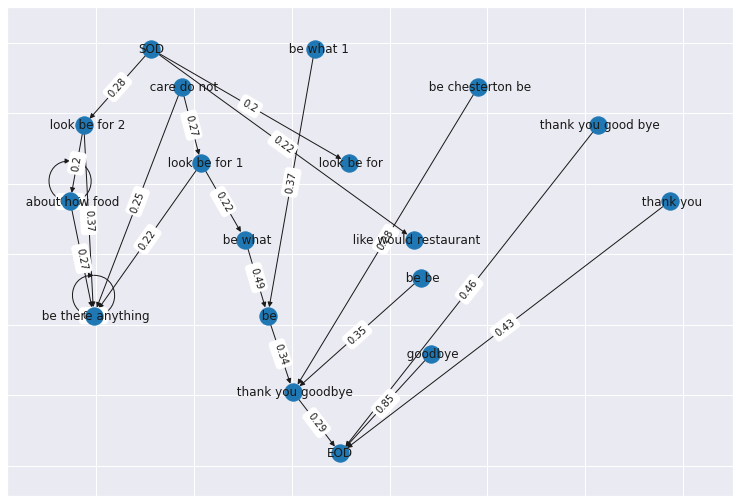

In [153]:
generateMarkovChain(df_matrix, numberLabelsMatrix)

In [162]:
createTSNE(df_all['cluster'], df_all, vectors_both, nClustersBoth, Perplexity=50)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


ValueError: ignored

#USER = BOTH_SEPARATELY

In [ ]:
print(df_user)

In [ ]:
#NORMALIZAR PARA JUNTAR TUDO NO DF FINAL (Y_PREDICTED, UTTERANCES, ETC) -> SÓ DEPOIS IR PARA BIGRAMS... ETC

if user == "both_separately" or user == "BOTH_SEPARATELY":
  if embedding == "sentenceTransformer":
    #user
    vectors_user = useSentenceTransformer(df_user, model)
    setofLabelsUser, numberLabelsUser = setLabels(df_user, problem)
    nClustersUser = numberLabelsUser
    labels_user, centers_user = ClusteringKMeans(vectors_user, nClustersUser, nomeFichPickle)
    df_user = df_user.assign(cluster = labels_user)


    vectors_system = useSentenceTransformer(df_system, model)
    setofLabelsSystem, numberLabelsSystem = setLabels(df_system, problem)
    nClustersSystem = numberLabelsSystem
    labels_system, centers_system = ClusteringKMeans(vectors_system, nClustersSystem, nomeFichPickle)
    df_system = df_system.assign(cluster = labels_system)

    
    df_final = pd.concat([df_user, df_system])
    df_final.sort_values(by=['sequence'], inplace=True) 

    #externalEvaluationMultiLabel(df_final) #resolver

  #if embedding == "word2vec":
    #vectors_system = word2vec(df_system) 
    #vectors_user = word2vec(df_user) 
  #if embedding == "tfidf":
    #print("tf-idf")




In [ ]:

if user == "both_separately" or user == "BOTH_SEPARATELY":
  if labellingMethod == "bigram":
    bigrams_user = describeClustersBigrams(df_user, labels_user)
    cluster_labels_user = bigrams_user['labels'].to_dict()
    df_user['labelling'] = df_user['cluster'].map(lambda x: cluster_labels_user.get(x, None))

    bigrams_system = describeClustersBigrams(df_system, labels_system)
    cluster_labels_system = bigrams_system['labels'].to_dict()
    df_system['labelling'] = df_system['cluster'].map(lambda x: cluster_labels_system.get(x, None))
    
    # to increment number of clusters for Markov Model
    df_system['cluster'] = df_system['cluster'].add(nClustersSystem)
    for key in list(cluster_labels_system):
      cluster_labels_system[key + nClustersSystem] = cluster_labels_system.pop(key)

    df_system['labelling'] = df_system['cluster'].map(lambda x: cluster_labels_system.get(x, None))

  #merge dataframes back together and get the necessary for next steps
  df_final = pd.concat([df_user, df_system])
  df_final.sort_values(by=['sequence'], inplace=True) 
  if labellingMethod == "verbs":
    print("por fazer")
  if labellingMethod == "nearestSentence":
    print("por fazer")

In [ ]:
cluster_labels_users = bigrams_user['labels'].to_dict()
cluster_labels_system = bigrams_system['labels'].to_dict()

# get list of values
listValuesUsers = (list(cluster_labels_users.values()))
listValuesSystems = (list(cluster_labels_system.values()))
listValuesClusters = listValuesUsers + listValuesSystems
print(listValuesClusters)

In [ ]:
n = (nClusters*2)+2
occurrence_matrix = np.zeros((n, n)) #nclusters(system+user) + 2 (para EOD e SOD)
#CRIAR MATRIZ DE OCORRÊNCIAS

for i in range(df_final['dialogue_id'].iat[-1]+1):

#for i in range(20): #20 primeiros diálogos
  turno_anterior = 0
  fim_dialogo = -1
  inicio_dialogo = df_final['cluster'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == 0)]
  occurrence_matrix[nClusters, inicio_dialogo] = occurrence_matrix[nClusters, inicio_dialogo] + 1 
  for turno in df_final['turn_id'].loc[(df_final.dialogue_id == i) & (df_final.turn_id != 0)]:
    dialogo = df_final['cluster'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == turno)]
    dialogo_anterior = df_final['cluster'].loc[(df_final.dialogue_id == i) & (df_final.turn_id == turno_anterior)] 
    occurrence_matrix[dialogo_anterior, dialogo] = occurrence_matrix[dialogo_anterior, dialogo] + 1
    turno_anterior = turno
    fim_dialogo = dialogo
  occurrence_matrix[fim_dialogo, nClusters+1] = occurrence_matrix[fim_dialogo, nClusters+1]  + 1 


print(occurrence_matrix)

In [ ]:
names = []
names = listValuesClusters

word1 = 'SOD'
word2 = 'EOD'
ttl = word1 , word2
names.extend(ttl)

print(names)

In [ ]:
def createMatrix(): #return of matrix

  matriz = np.zeros(shape=(n, n))
  t = df_final['cluster']
  m = transition_matrix(n, t)
  print(m)
  df_matrix = pd.DataFrame(m, index=names, columns=names)
  df_matrix = df_matrix.round(decimals = 2)
  print(df_matrix)
  return df_matrix

In [ ]:
matrix = createMatrix()

In [ ]:

# Find the sum of each row
row_sums = np.sum(occurrence_matrix, axis=1)

# Divide each element in the matrix by the corresponding row sum
transition_matrix = occurrence_matrix / (row_sums[:, np.newaxis])
#print(transition_matrix)
transition_matrix = np.nan_to_num(transition_matrix)

df_matrix = pd.DataFrame(transition_matrix, index=names, columns=names)
df_matrix = df_matrix.round(decimals = 2)
#df_matrix = np.nan_to_num(df_matrix)
#print(df_matrix)

In [ ]:
print(df_matrix)

In [ ]:
def generateMarkovChain(matrix):
  states = list(matrix.columns.values)
  # equals transition probability matrix of changing states given a state
  q_df = pd.DataFrame(columns=states, index=states)
  q_df = matrix
  for p in range(nClusters):
    q_df.loc[states[p]].reset_index = matrix.iloc[p]
  #q = q_df.values
  def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges
  edges_wts = _get_markov_edges(q_df)
  #pprint(edges_wts)
  # create graph object
  G = nx.MultiDiGraph()
  # nodes correspond to states
  G.add_nodes_from(states)
  # edges represent transition probabilities
  for k, v in edges_wts.items():
      tmp_origin, tmp_destination = k[0], k[1]
      G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
  #remove edges below threshold
  threshold = 0.2
  G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
  nx.draw_networkx(G, pos)
  # create edge labels for jupyter plot but is not necessary
  edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
  nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
  nx.drawing.nx_pydot.write_dot(G, '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot')
  # generate pdf with markov chain
  path = '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot'
  s = Source.from_file(path)
  s.view()

In [ ]:
# https://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017
def generateMarkovChain(matrix, classes):

  states = list(classes)
  # equals transition probability matrix of changing states given a state
  q_df = pd.DataFrame(columns=states, index=states)
  q_df = matrix

  #for p in range(nClusters):
    #q_df.loc[states[p]] = matrix.iloc[p]
    #q_df.loc[states[p]].reset_index = matrix.iloc[p]

  def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges
  
  edges_wts = _get_markov_edges(q_df)
  #pprint(edges_wts)
  
  # create graph object
  G = nx.MultiDiGraph()

  # nodes correspond to states
  G.add_nodes_from(states)
  #print(f'Nodes:\n{G.nodes()}\n')

  # edges represent transition probabilities
  for k, v in edges_wts.items():
      tmp_origin, tmp_destination = k[0], k[1]
      G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
  #print(f'Edges:')
  #pprint(G.edges(data=True))    



  #remove edges below threshold
  #threshold = 0.15
  #G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])

  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
  nx.draw_networkx(G, pos)

  # create edge labels for jupyter plot but is not necessary
  edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
  nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
  nx.drawing.nx_pydot.write_dot(G, '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot')

  # generate pdf with markov chain
  path = '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot'
  s = Source.from_file(path)
  s.view()

  #remove edges below threshold
  #threshold = 0.15
  #G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])

  # #usingnx.nx_agraph.graphviz_layout
  # pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
  # nx.draw_networkx(G, pos)


  # nx.draw(G, with_labels=True)
  # plt.show()
  # plt.savefig("large_markov_chain.pdf")




  # # create edge labels for jupyter plot but is not necessary
  # edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
  # nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)

  # nx.drawing.nx_pydot.write_dot(G, '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot')
  # print("entreee3")
  # # generate pdf with markov chain
  # path = '/content/drive/MyDrive/ColabNotebooks/pet_dog_markov.dot'
  # s = Source.from_file(path)
  # s.view()







  #edges_wts = _get_markov_edges(q_df)
  #pprint(edges_wts)
  # create graph object
  #G = nx.MultiDiGraph()
 
  # nodes correspond to states
  #G.add_nodes_from(states)

  # edges represent transition probabilities
  #for k, v in edges_wts.items():
      #tmp_origin, tmp_destination = k[0], k[1]
      #G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

  #remove edges below threshold
  #threshold = 0.2
  #G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])
  #nx.drawing.nx_pydot.write_dot(G, '/mnt/mydata/markov' + '.dot')

In [ ]:
generateMarkovChain(df_matrix, names)

In [ ]:
generateMarkovChain(df_matrix)

In [ ]:
# Define the transition matrix
transition_matrix = matrix

# Create a directed graph using networkx
G = nx.DiGraph()

# Add nodes to the graph, representing the states in the Markov Chain
G.add_nodes_from(['A', 'B', 'C'])

# Add edges to the graph, representing the transitions between states
for i, row in enumerate(transition_matrix):
    for j, prob in enumerate(row):
        if prob != 0:
            G.add_edge('A', 'B', weight=prob)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [ ]:
generateMarkovChain(df_matrix)

In [ ]:
some_constant = 10 #Increment all columns by 10, for n_cluster to be different of user



#clustering for user
kmeans_user = KMeans(n_clusters=10)
kmeans_user.fit(vectors_user)
labels_user = kmeans_user.labels_
df_user['cluster'] = kmeans_user.labels_

# Save the model to a file
with open('kmeans.pkl', 'wb') as f:
  pickle.dump(kmeans_user, f)

#bigraming for user
bigrams_user = describeClustersBigrams(df_user, labels_user)
names_user = [_ for _ in bigrams_user]
cluster_labels_users = bigrams_user['labels'].to_dict()
df_user['label'] = df_user['cluster'].map(lambda x: cluster_labels_users.get(x, None))

#clustering for system
kmeans_system = KMeans(n_clusters=10)
kmeans_system.fit(vectors_system)
labels_system = kmeans_system.labels_
df_system['cluster'] = kmeans_system.labels_

# Increment all columns by 10, for n_cluster to be different of user
df_system['cluster'] = df_system['cluster'].add(some_constant)


#bigraming for system
bigrams_system = describeClustersBigrams(df_system, labels_system)
names_system = [_ for _ in bigrams_system]
cluster_labels_system = bigrams_system['labels'].to_dict()

for key in list(cluster_labels_system):
    cluster_labels_system[key + some_constant] = cluster_labels_system.pop(key)

df_system['label'] = df_system['cluster'].map(lambda x: cluster_labels_system.get(x, None))


#merge dataframes back together
df_final = pd.concat([df_user, df_system])

In [ ]:
nomeFichPickle = 'kmeans.pkl'
#K-Means
y_predicted, centers = ClusteringKMeans(vectors, nClusters, nomeFichPickle)


#só caso exista labels 
if 'trueLabel' in normalizedDF.columns: 
  Evaluation(y_predicted, normalizedDF, setOfLabels, nClusters)

In [ ]:
# Describe Clusters -> Bigrams | Verbs | Closest Document

bigrams = describeClustersBigrams(normalizedDF, y_predicted) #return dataframe with n_clusters and respective label (bigram)
print(bigrams)

#verbs = describeClustersVerbs(normalizedDF, y_predicted) #return dataframe with n_clusters and respective label (verbs)
#print(verbs)

closestDocuments = describeClustersClosest(normalizedDF, y_predicted, vectors, centers)
print(closestDocuments)

In [ ]:
#matrix = createMatrix(bigrams, csvFileInput, y_predicted) #change first position according the way we wanna describe the clusters


In [ ]:
# #create DIALOG_ID
# def createDialogID ()
df_initial = pd.read_csv(csvFileInput, on_bad_lines='skip', sep=";")
# dialog = 0
# result = []
# i_anterior = -1
# for i in df_initial['turn_id']:
#   if i_anterior == -1 or i > i_anterior:
#     i_anterior = i
#   else:
#     dialog = dialog + 1
#     i_anterior = -1
#   result.append(dialog)
# df_initial['dialogue_id'] = result
# print(df_initial)

In [ ]:
# # CRIAR DATAFRAME COM UTTERANCE E O RESPETIVO CLUSTER
# df_TesteMatriz = pd.DataFrame({'utterance': normalizedDF['utterance'], 'label': y_predicted})

# cluster_labels = bigrams['labels'].to_dict()

# df_TesteMatriz['label'] = df_TesteMatriz['label'].map(lambda x: cluster_labels.get(x, None))

# print(df_TesteMatriz)

In [ ]:
df_initial['sequence'] = [i for i in range(len(df_initial))]
some_constant = 10 #Increment all columns by 10, for n_cluster to be different of user

#separate dataframe by speaker
df_user = df_initial[df_initial['speaker'] == 'USER']
df_system = df_initial[df_initial['speaker'] == 'SYSTEM']

vectors_user = useSentenceTransformer(df_user, model)
vectors_system = useSentenceTransformer(df_system, model)

#clustering for user
kmeans_user = KMeans(n_clusters=10)
kmeans_user.fit(vectors_user)
labels_user = kmeans_user.labels_
df_user['cluster'] = kmeans_user.labels_

# Save the model to a file
with open('kmeans.pkl', 'wb') as f:
  pickle.dump(kmeans_user, f)

#bigraming for user
bigrams_user = describeClustersBigrams(df_user, labels_user)
names_user = [_ for _ in bigrams_user]
cluster_labels_users = bigrams_user['labels'].to_dict()
df_user['label'] = df_user['cluster'].map(lambda x: cluster_labels_users.get(x, None))

#clustering for system
kmeans_system = KMeans(n_clusters=10)
kmeans_system.fit(vectors_system)
labels_system = kmeans_system.labels_
df_system['cluster'] = kmeans_system.labels_
# Increment all columns by 10, for n_cluster to be different of user
df_system['cluster'] = df_system['cluster'].add(some_constant)

#bigraming for system
bigrams_system = describeClustersBigrams(df_system, labels_system)
names_system = [_ for _ in bigrams_system]
cluster_labels_system = bigrams_system['labels'].to_dict()
print
for key in list(cluster_labels_system):
    cluster_labels_system[key + some_constant] = cluster_labels_system.pop(key)

df_system['label'] = df_system['cluster'].map(lambda x: cluster_labels_system.get(x, None))


#merge dataframes back together
df_final = pd.concat([df_user, df_system])

In [ ]:
# get list of values
listValuesUsers = (list(cluster_labels_users.values()))
listValuesSystems = (list(cluster_labels_system.values()))
listValuesClusters = listValuesUsers + listValuesSystems
print(listValuesClusters)

In [ ]:
listValuesUsers

In [ ]:
print(df_final)

In [ ]:
#ORDENAR DA FORMA ORIGINAL DO DATASET

df_final.sort_values(by=['sequence'], inplace=True)  
#df_final = df_final.join(extracted_col)

print(df_final.head(20))

In [ ]:
pd.DataFrame(df_final).to_csv(r'/content/drive/MyDrive/ColabNotebooks/datasets/FINAL1.csv', index=False)

In [ ]:
n = (nClusters*2)+2
occurrence_matrix = np.zeros((n, n)) #nclusters(system+user) + 2 (para EOD e SOD)
#CRIAR MATRIZ DE OCORRÊNCIAS

for i in range(df_final['dialogs_id'].iat[-1]+1):

#for i in range(20): #20 primeiros diálogos
  turno_anterior = 0
  fim_dialogo = -1
  inicio_dialogo = df_final['cluster'].loc[(df_final.dialogs_id == i) & (df_final.turn_id == 0)]
  occurrence_matrix[20, inicio_dialogo] = occurrence_matrix[20, inicio_dialogo] + 1 
  for turno in df_final['turn_id'].loc[(df_final.dialogs_id == i) & (df_final.turn_id != 0)]:
    dialogo = df_final['cluster'].loc[(df_final.dialogs_id == i) & (df_final.turn_id == turno)]
    dialogo_anterior = df_final['cluster'].loc[(df_final.dialogs_id == i) & (df_final.turn_id == turno_anterior)] 
    occurrence_matrix[dialogo_anterior, dialogo] = occurrence_matrix[dialogo_anterior, dialogo] + 1
    turno_anterior = turno
    fim_dialogo = dialogo
  occurrence_matrix[fim_dialogo, 21] = occurrence_matrix[fim_dialogo, 21]  + 1 


#print(occurrence_matrix)

In [ ]:

names = []
names = listValuesClusters

word1 = 'SOD'
word2 = 'EOD'
ttl = word1 , word2
names.extend(ttl)

print(names)


In [ ]:

# Find the sum of each row
row_sums = np.sum(occurrence_matrix, axis=1)

# Divide each element in the matrix by the corresponding row sum
transition_matrix = occurrence_matrix / row_sums[:, np.newaxis]
#print(transition_matrix)
transition_matrix = np.nan_to_num(transition_matrix)

df_matrix = pd.DataFrame(transition_matrix, index=names, columns=names)
df_matrix = df_matrix.round(decimals = 2)
#df_matrix = np.nan_to_num(df_matrix)
print(df_matrix)

In [ ]:
generateMarkovChain(df_matrix)

In [ ]:
#VERIFICAR SE O CLUSTER MAIS PROVAVEL ESTÁ OK...

In [ ]:
#CRIAR O DATAFRAME COM O CLUST ORIGINAL E O MAIS PROVÁVEL
# Create a sample dataframe with two columns: 'utterance' and 'cluster'
dfteste = pd.DataFrame({'utterance': df_final['utterance'],
                   'cluster': df_final['cluster']})
# Group the dataframe by 'cluster' and apply a lambda function to create a list of 'utterance' values for each cluster
result = dfteste.groupby('cluster').apply(lambda x: ["'{}'".format(utterance) for utterance in x['utterance']])

# Convert the resulting Series object to a dataframe
result_df = result.to_frame(name='utterances')


finalDF = pd.DataFrame()

LC=[] #clusters
for p in range(20):
  LC.append(f'Cluster {p}')
finalDF = pd.DataFrame(LC, columns=['clusters']) 




matriz = pd.DataFrame(df_matrix)

finalDF['clustOriginal'] = matriz.index[:-2]


# add utterances to respective cluster
finalDF['utterances'] = result_df['utterances'] 

# axis=1 to find max from each row
x = matriz.idxmax(axis=1)

finalDF['clusterMostProb'] = x.values[:-2] #RESOLVER E PENSAR SE ISTO ESTÁ CORRETO


print(finalDF)

In [ ]:
# CRIAR DATAFRAME COM UTTERANCE EM FORMA DE EMBEDDING E O RESPETIVO CLUSTER
df_Teste = pd.DataFrame({'utterance': df_final['utterance'], 'cluster': df_final['cluster']})

# transform Series into list
sentences = df_Teste['utterance'].tolist()

# Define a custom function that takes a text string as input and returns the embedding generated by Sentence Transformer
def get_embedding(text):
    embedding = model.encode([text])[0]
    return embedding

# Apply the custom function to the 'text' column using the apply() function, and store the result in a new 'embedding' column
df_Teste['embedding'] = df_Teste['utterance'].apply(get_embedding)
print(df_Teste)

In [ ]:
def predictClusterInput(model, given_sentence):
  #print(given_sentence)
  embeddings = model.encode(given_sentence) #encoding sentence
  vectors = np.array(embeddings)

  with open('kmeans.pkl', 'rb') as f:
    kmeans = pickle.load(f)

  predicted_cluster = kmeans.predict(vectors)
  intCluster = predicted_cluster[0]
  #print(intCluster)
  return intCluster, vectors

In [ ]:
def predictAnswer(clusterPredicted, givenEmbedding, df_Teste, finalDF):

  string = finalDF.iloc[clusterPredicted, 3] #dado o cluster predicto vai aceder ao cluster mais provavel de ir, #3 é o campo do mais provável

  filtered_df = finalDF[finalDF['clustOriginal'].str.contains(string)] # ir buscar a linha do cluster 

  index = filtered_df.index.item() #ter o indice do cluster
  
  df_embedding = df_Teste.loc[df_Teste['cluster'] == index]
  

  dfSimiliariedade = pd.DataFrame(columns=['utterance', 'embedding'], index=df_embedding.index)
  dfSimiliariedade['utterance'] = df_embedding['utterance']
  dfSimiliariedade['embedding'] = df_embedding['embedding']

  #print(dfSimiliariedade)
  #print(cosine_similarity([givenEmbedding], [df_embedding['embedding'][3]])
  # Define a custom function that takes an embedding as input and returns the cosine similarity with the given embedding
  #def get_similarity(embedding):
    # Retrieve the embedding from the 'embedding' column
    #embedding = df_embedding.iloc[index]['embedding']
    # Calculate the cosine similarity with the given embedding
    #similarity = cosine_similarity([givenEmbedding], [embedding])
    #return similarity
  #print(givenEmbedding.shape)
  #a = np.reshape(df_embedding['embedding'][3], (1, 384)) 
  #print(a.shape)
  #print(cosine_similarity(givenEmbedding, a))
  result = []
  for i in dfSimiliariedade['embedding']:
    a = np.reshape(i, (1, 384))
    result.append(cosine_similarity(givenEmbedding, a)[0][0])
    #dfSimiliariedade['cosSimilarity'] = dfSimiliariedade['cosSimilarity'].a(cosine_similarity(givenEmbedding, a))
    #df_embedding['similarity'] = cosine_similarity(givenEmbedding, a)
  dfSimiliariedade['cosSimilarity'] = result
  #print(dfSimiliariedade)
  # Apply the custom function to the 'embedding' column using the apply() function, and store the result in a new 'similarity' column
  #df_embedding['similarity'] = df_embedding.apply(get_similarity)
  
  # Find the row with the highest similarity
  most_similar_row = dfSimiliariedade.loc[dfSimiliariedade['cosSimilarity'].idxmax()]
  
  # Print the most similar embedding
  print("Chatbot:" + most_similar_row['utterance'] )

#Run chatbot

In [ ]:
model = miniLM6
while True:
  sentenceInput = input("User: ")
  givenSentence = [sentenceInput]
  clusterPredicted, givenEmbedding = predictClusterInput(model, givenSentence) #prever o cluster, apenas está formatado para usar o SentenceTransformer
  print(clusterPredicted)
  predictAnswer(clusterPredicted, givenEmbedding, df_Teste, finalDF)